<a href="https://colab.research.google.com/github/Greatmonkeysden/Live_fire_detection/blob/main/Fire_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a fire detection model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#Importing libs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten
import pathlib
#Getting the path of the data
data_dir_train = pathlib.Path('/content/drive/MyDrive/Fire-Detection-train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/Fire-Detection-test')

In [4]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))

Number of Images in Train: 3
Number of Images in Test: 3


In [16]:
#Preprocessing the data
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=11,
validation_split=0.2,
subset='training',
image_size=(150,150),
batch_size=16)

Found 641 files belonging to 2 classes.
Using 513 files for training.


In [17]:
val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=11,
validation_split=0.2,
subset='validation',
image_size=(150,150),
batch_size=16)

Found 641 files belonging to 2 classes.
Using 128 files for validation.


In [13]:
class_names = train_ds.class_names
class_names

['0', '1']

In [27]:
#Building the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(48, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (fire or no fire)
])
#Compilling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
33/33 [==============================] - 27s 721ms/step - loss: 75.1925 - accuracy: 0.7973 - val_loss: 0.4587 - val_accuracy: 0.8359
Epoch 2/10
33/33 [==============================] - 29s 858ms/step - loss: 0.1888 - accuracy: 0.9337 - val_loss: 0.3681 - val_accuracy: 0.8828
Epoch 3/10
33/33 [==============================] - 25s 734ms/step - loss: 0.0906 - accuracy: 0.9786 - val_loss: 0.3660 - val_accuracy: 0.9062
Epoch 4/10
33/33 [==============================] - 24s 688ms/step - loss: 0.0338 - accuracy: 0.9922 - val_loss: 0.3653 - val_accuracy: 0.8984
Epoch 5/10
33/33 [==============================] - 25s 730ms/step - loss: 0.0263 - accuracy: 0.9981 - val_loss: 0.4458 - val_accuracy: 0.8828
Epoch 6/10
33/33 [==============================] - 24s 714ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.0566 - val_accuracy: 0.8438
Epoch 7/10
33/33 [==============================] - 29s 865ms/step - loss: 0.0879 - accuracy: 0.9669 - val_loss: 0.6156 - val_accuracy: 0.875

In [29]:
import tensorflow as tf
model.save('fire_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
fire_detection_model = tf.keras.models.load_model("fire_detection.h5")

In [31]:
# Funtion to read image and transform image to tensor
def load_and_prep_image(filename, img_shape = 150):
    img = tf.io.read_file(filename) #read image
    img = tf.image.decode_image(img) # decode the image to a tensor
    img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
    return img

In [32]:
# Funtion to read image and give desired output with image
def pred_and_plot(model, filename, class_names):
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    sh_image = plt.imread(filename)
    plt.imshow(sh_image)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 160ms/step


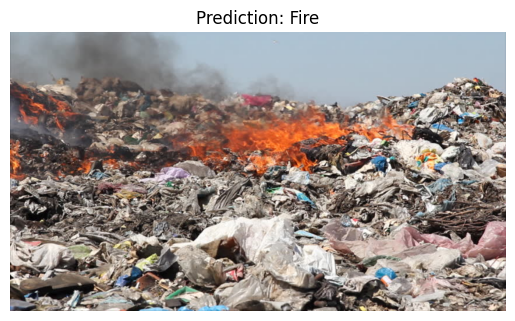

In [33]:
# specifying path to sample image from list of test images.
sample_img = '/content/drive/MyDrive/Fire-Detection (1)/1/1.jpg'

# predefining class names so not to confuse with the output
class_names = ['Not-fire','Fire']

# reading the input and checking the output
pred_and_plot(model,sample_img,class_names)